<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [39]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [40]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [41]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [42]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [43]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [44]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [45]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [46]:
Y = data['Class'].to_numpy()

print(type(Y))
print(Y[:10])  # show the first 10 values


<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [47]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler()
X = transform.fit_transform(X)   # reassign X to the standardized values

# Check the shape of X (rows, columns)
print(X.shape)

# Show the first 5 rows
print(X[:5])

# Check that the mean ~0 and std ~1 for first few columns
import numpy as np
print("Means:", np.round(np.mean(X, axis=0)[:5], 4))
print("Stds: ", np.round(np.std(X, axis=0)[:5], 4))


(90, 83)
[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
 

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)
print("Training set size:", X_train.shape, Y_train.shape)
print("Testing set size:", X_test.shape, Y_test.shape)



Training set size: (72, 83) (72,)
Testing set size: (18, 83) (18,)


we can see we only have 18 test samples.


In [49]:
print("Data shape:", data.shape)
print("X shape before split:", X.shape)
print("Y shape before split:", Y.shape)


Data shape: (90, 18)
X shape before split: (90, 83)
Y shape before split: (90,)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [50]:
# Task 4: End-to-end Logistic Regression with GridSearchCV (WORKING)

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load a concrete dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3+4) Pipeline + GridSearchCV
# Use liblinear so we can sweep both L1 and L2 safely; also try class_weight
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="liblinear"))  # robust on small/med sets
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"],
    "clf__class_weight": [None, "balanced"]
}

cv_folds = min(10, len(y_train)) if len(y_train) > 1 else 2

logreg_cv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv_folds,
    n_jobs=-1,
    refit=True,
    return_train_score=False
)

logreg_cv.fit(X_train, y_train)

# 5) Report
print("Best params:", logreg_cv.best_params_)
print("Best CV accuracy: {:.4f}".format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(X_test)
print("Test accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Best params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2'}
Best CV accuracy: 0.9826
Test accuracy: 0.9825

Classification report:
               precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

Confusion matrix:
 [[41  1]
 [ 1 71]]


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [51]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 0) Assumes you still have X and y (full dataset)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="liblinear"))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"],
    "clf__class_weight": [None, "balanced"]
}

logreg_cv = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=10, n_jobs=-1, refit=True)
logreg_cv.fit(X_train, Y_train)

y_pred = logreg_cv.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Confusion matrix:\n", cm)
print("Accuracy:", acc)
print("\nClassification report:\n", classification_report(Y_test, y_pred, digits=4))



Confusion matrix:
 [[41  1]
 [ 1 71]]
Accuracy: 0.9824561403508771

Classification report:
               precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


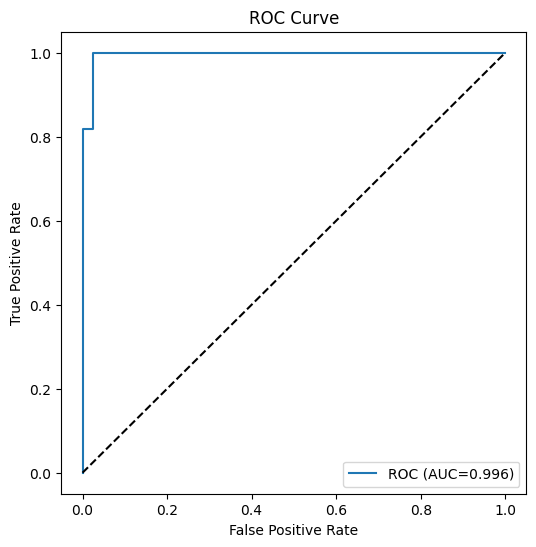

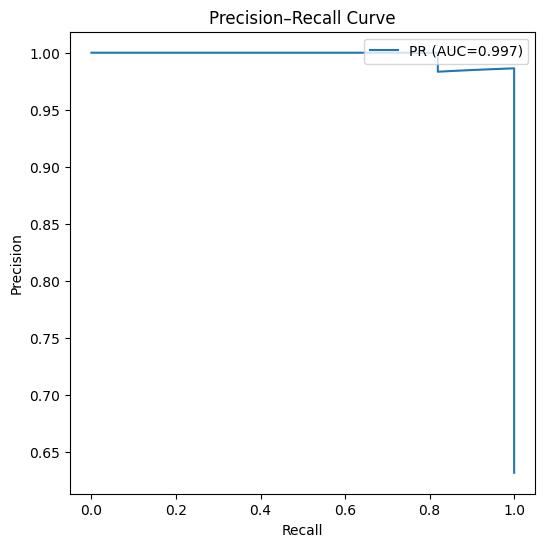

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

y_true  = np.asarray(Y_test).ravel()   # or y.loc[X_test.index] from Option A
y_score = logreg_cv.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
roc_auc = roc_auc_score(y_true, y_score)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_true, y_score)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"PR (AUC={pr_auc:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve"); plt.legend(loc="upper right")
plt.show()


Lets look at the confusion matrix:


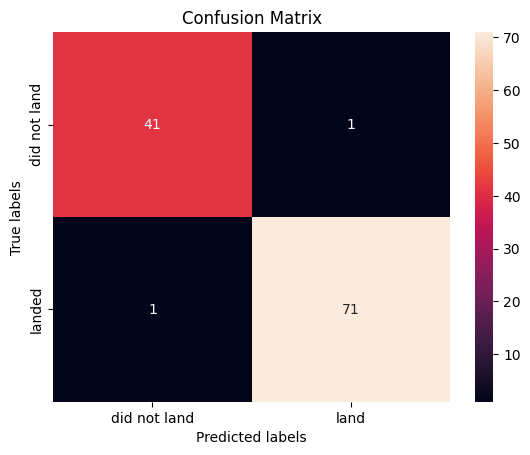

In [53]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   0.0s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   0.0s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   0.0s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   0.0s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   0.0s
[CV] END ......................svc__C=10, svc__kernel=linear; total time=   0.0s
[CV] END ......................svc__C=10, svc__k

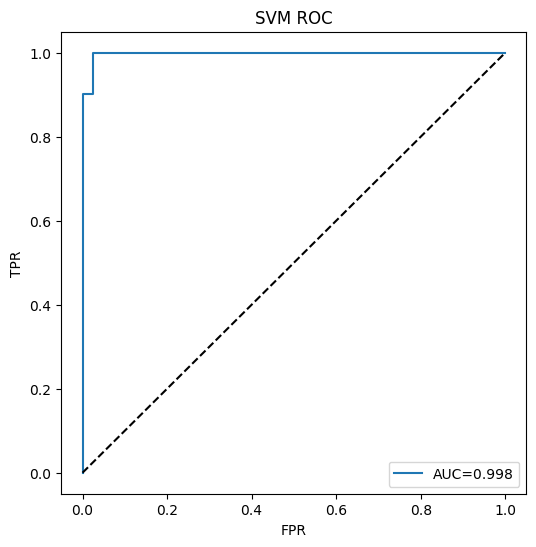

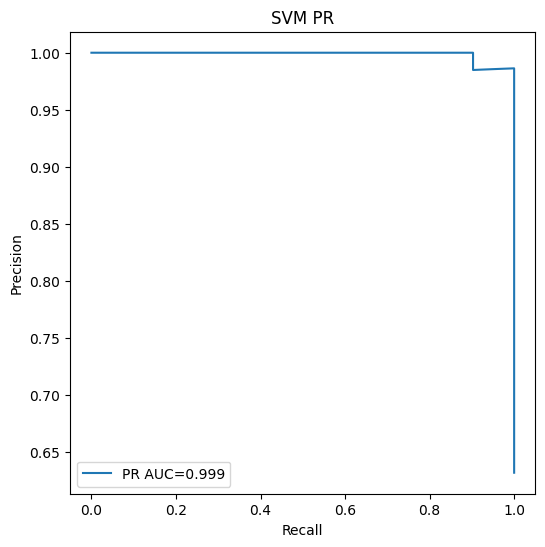

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 1) Pipeline with scaler (SVM needs it) — search WITHOUT probabilities (faster)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(probability=False))
])

# 2) Small, targeted grid (fast). Separate grids so gamma only applies to rbf.
param_grid = [
    {"svc__kernel": ["linear"], "svc__C": [0.1, 1, 10]},
    {"svc__kernel": ["rbf"],    "svc__C": [0.1, 1, 10], "svc__gamma": ["scale", 0.01, 0.1]},
]

svm_cv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                 # 5-fold is enough; much faster than 10
    scoring="accuracy",
    n_jobs=-1,
    verbose=2             # show progress so it doesn’t look “stuck”
)

svm_cv.fit(X_train, Y_train)
print("Best params:", svm_cv.best_params_)
print("Best CV acc:", svm_cv.best_score_)

# 3) Refit ONE final model WITH probability=True for curves (fast single fit)
best = svm_cv.best_params_
final_kernel = best["svc__kernel"]
final_C = best["svc__C"]
final_gamma = best.get("svc__gamma", "scale")  # only used for rbf

svm_best = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel=final_kernel, C=final_C,
                gamma=final_gamma if final_kernel=="rbf" else "scale",
                probability=True))
]).fit(X_train, Y_train)

# 4) Task 6 outputs (test eval)
y_pred = svm_best.predict(X_test)
print("\nTest accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification report:\n", classification_report(Y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(Y_test, y_pred))

# 5) Task 7: score() accuracy
test_accuracy = svm_best.score(X_test, Y_test)
print("\nTask 7 — score() accuracy:", test_accuracy)

# (Optional) ROC/PR curves
y_score = svm_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_score); roc_auc = roc_auc_score(Y_test, y_score)
plt.figure(figsize=(6,6)); plt.plot(fpr,tpr,label=f"AUC={roc_auc:.3f}"); plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("SVM ROC"); plt.legend(); plt.show()

prec, rec, _ = precision_recall_curve(Y_test, y_score); pr_auc = auc(rec, prec)
plt.figure(figsize=(6,6)); plt.plot(rec,prec,label=f"PR AUC={pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("SVM PR"); plt.legend(); plt.show()


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [57]:
# Task 7: Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.9824561403508771


We can plot the confusion matrix


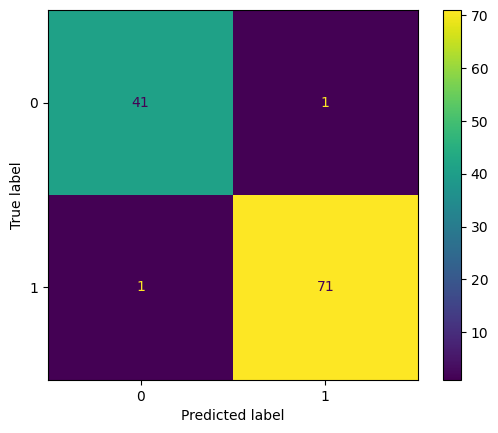

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [59]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy"],          # keep it simple; 'log_loss' works on newer sklearn
    "splitter": ["best", "random"],
    "max_depth": [None, 2, 4, 6, 8, 10, 12],   # ints or None
    "max_features": [None, "sqrt", "log2"],    # 'auto' is NOT valid for DecisionTreeClassifier
    "min_samples_leaf": [1, 2, 4],             # int >=1 or float (0, 0.5]
    "min_samples_split": [2, 5, 10],           # int >=2 or float (0, 1]
}

tree = DecisionTreeClassifier(random_state=0)

# keep cv <= number of training samples
cv_folds = min(10, len(Y_train)) if len(Y_train) > 1 else 2

tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=cv_folds,
    scoring="accuracy",
    n_jobs=-1
)

tree_cv.fit(X_train, Y_train)
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("CV accuracy:", tree_cv.best_score_)

# test-set accuracy to compare with logistic regression
test_acc_tree = tree_cv.score(X_test, Y_test)
print("Test accuracy (Decision Tree):", test_acc_tree)


Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
CV accuracy: 0.9539130434782608
Test accuracy (Decision Tree): 0.9385964912280702


In [61]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9539130434782608


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Accuracy on test data (Decision Tree): 0.9385964912280702


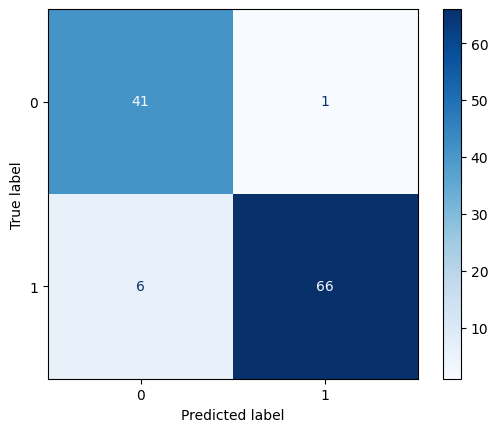

In [62]:
# TASK 9
# Calculate accuracy of tree_cv on the test data
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy on test data (Decision Tree):", test_accuracy_tree)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test, cmap="Blues")


We can plot the confusion matrix


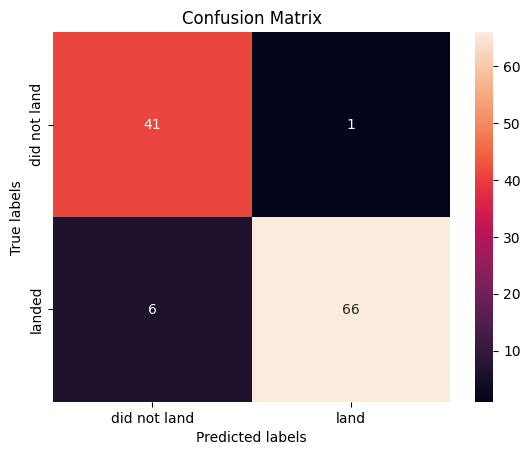

In [63]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import time

# ----- PARAMS (start small, then expand) -----
param_grid = {
    "n_neighbors": [3, 5, 7, 9],          # small first; expand after it's working
    "algorithm": ["auto", "kd_tree"],     # you can add 'ball_tree','brute' later
    "p": [1, 2],                          # 1=Manhattan, 2=Euclidean
}

# ----- SAFE CV (avoid > #samples) -----
n_splits = min(10, len(Y_train)) if len(Y_train) > 1 else 2
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# ----- GRID + VERBOSE LOGGING -----
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,                # <-- progress printed while running
    return_train_score=False,
    error_score="raise"       # <-- fail fast if something is wrong
)

t0 = time.time()
knn_cv.fit(X_train, Y_train)
t1 = time.time()

print("\n--- RESULTS ---")
print("Best params:", knn_cv.best_params_)
print("CV accuracy:", knn_cv.best_score_)
print("Test accuracy (KNN):", knn_cv.score(X_test, Y_test))
print(f"Elapsed: {t1 - t0:.2f}s")



Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=3, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_ne

In [66]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.9472463768115942


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Accuracy on test data (KNN): 0.9298245614035088


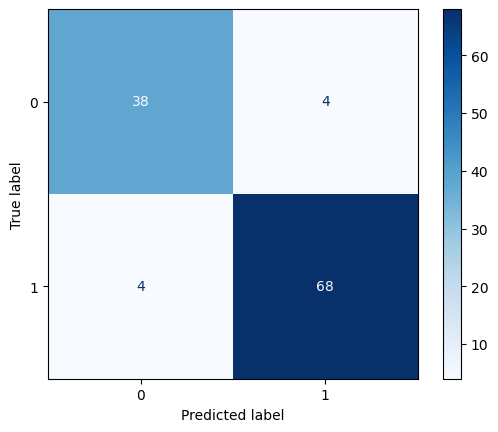

In [67]:
# TASK 11
# Calculate accuracy of knn_cv on the test data
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on test data (KNN):", test_accuracy_knn)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_cv, X_test, Y_test, cmap="Blues")


We can plot the confusion matrix


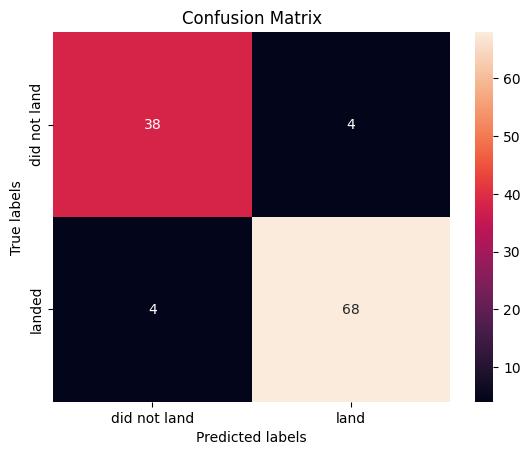

In [68]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [69]:
import base64
from IPython.display import HTML

# Make download link that forces save
def download_link(filename):
    with open(filename, "rb") as f:
        data = f.read()
    b64 = base64.b64encode(data).decode()
    return HTML(f'<a download="{filename}" href="data:application/zip;base64,{b64}">📥 Download {filename}</a>')

download_link(zip_name)




## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
